<a href="https://colab.research.google.com/github/JackRossProjects/DS-Unit-1-Sprint-2-Statistics/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
column_headers=['A1','A2','A3','A4',
                          'A5','A6','A7','A8',
                          'A9','A10','A11','A12',
                          'A13','A14','A15','A16',]

In [0]:
df.columns = column_headers

In [5]:
df = df.replace({'?': np.NaN})
df['A14'].unique()

array(['00043', '00280', '00100', '00120', '00360', '00164', '00080',
       '00180', '00052', '00128', '00260', '00000', '00320', '00396',
       '00096', '00200', '00300', '00145', '00500', '00168', '00434',
       '00583', '00030', '00240', '00070', '00455', '00311', '00216',
       '00491', '00400', '00239', '00160', '00711', '00250', '00520',
       '00515', '00420', nan, '00980', '00443', '00140', '00094', '00368',
       '00288', '00928', '00188', '00112', '00171', '00268', '00167',
       '00075', '00152', '00176', '00329', '00212', '00410', '00274',
       '00375', '00408', '00350', '00204', '00040', '00181', '00399',
       '00440', '00093', '00060', '00395', '00393', '00021', '00029',
       '00102', '00431', '00370', '00024', '00020', '00129', '00510',
       '00195', '00144', '00380', '00049', '00050', '00381', '00150',
       '00117', '00056', '00211', '00230', '00156', '00022', '00228',
       '00519', '00253', '00487', '00220', '00088', '00073', '00121',
       '00470',

In [6]:
df.head(
)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
# Stretch Goal 1

In [0]:
for x in df['A2']:
  x = pd.to_numeric(x)

for x in df['A3']:
  x = pd.to_numeric(x)

for x in df['A8']:
  x = pd.to_numeric(x)

for x in df['A11']:
  x = pd.to_numeric(x)

for x in df['A14']:
  x = pd.to_numeric(x)

for x in df['A15']:
  x = pd.to_numeric(x)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [8]:
#df['A2']
type(df['A2'])

pandas.core.series.Series

In [9]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [10]:
df['A2'] = df['A2'].astype(float)
df['A11'] = df['A11'].astype(float)
df['A14'] = df['A14'].astype(float)
df['A15'] = df['A15'].astype(float)
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


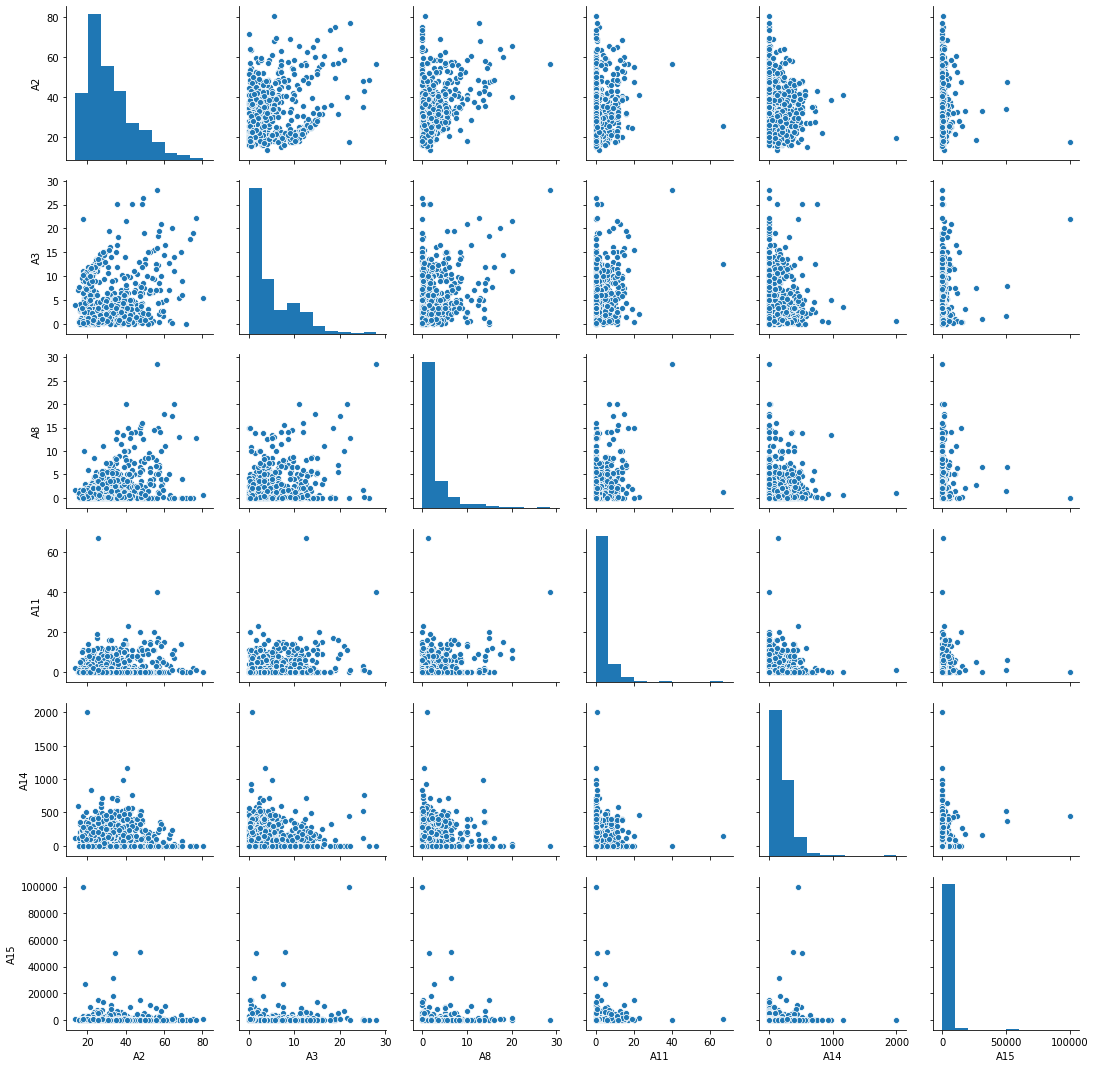

In [11]:
sns.pairplot(df)

In [12]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,677.000000,689.000000,689.000000,689.000000,676.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,183.988166,1018.862119
std,11.966670,4.978470,3.348739,4.866180,173.934087,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,74.500000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,277.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [13]:
plus_ = df[df['A16'] == '+']
minus_ = df[df['A16'] == '-']
minus_.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
69,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
70,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
71,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
72,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
73,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


In [14]:
plus_.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [15]:
minus_.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

33.730000000000004


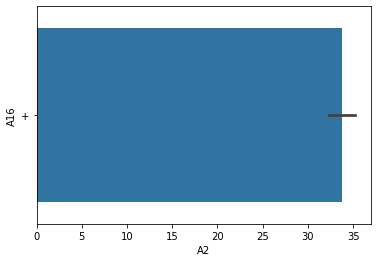

In [16]:
sns.barplot(x="A2", y="A16", data=plus_)
print(plus_['A2'].mean())

29.80823056300268


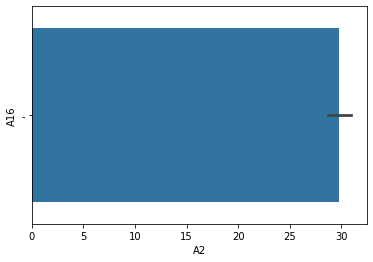

In [17]:
sns.barplot(x="A2", y="A16", data=minus_)
print(minus_['A2'].mean())

In [56]:
stats.ttest_ind(plus_['A2'], minus_['A2'], nan_policy='omit')

Ttest_indResult(statistic=4.295769602362607, pvalue=1.9966966407405674e-05)

In [0]:
# A2 seems to be higher on Class Names with +
# Class Names with + have a 12.34% higher mean for A2 than -.
# The P-value in the T-test above also indicated that the values in A2 have
# no effect on Class Name being + or -.

164.29666666666665


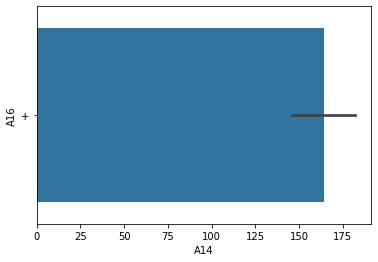

In [39]:
sns.barplot(x="A14", y="A16", data=plus_)
print(plus_['A14'].mean())

199.6994680851064


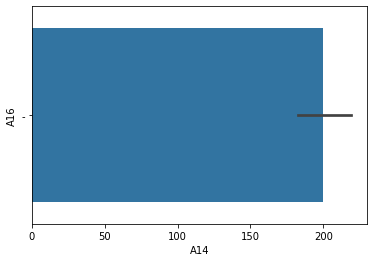

In [41]:
sns.barplot(x="A14", y="A16", data=minus_)
print(minus_['A14'].mean())

In [55]:
stats.ttest_ind(plus_['A14'], minus_['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6408733636831654, pvalue=0.008460849261398617)

In [0]:
# The T Test above shows a P-value of 0.008 which is less than our alpha value
# of 0.05. This means that we must reject the null hypothesis that the values
# in column A14 have no effect on Class Name being + or -. And accept the
# alternative hypothesis that the values is A14 effect a Class Name being
# + or -.

In [0]:
# Now I will run a Chi-squared test to see how likely it is that the observed
# distribution above is due to chance.

In [46]:
cut_points = [0,9,19,29,39,49,59,69,79,89]
bin_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

df['A2_bins'] = pd.cut(df['A2'], cut_points, labels=bin_names)

cut_points = [0,500,1000,1500,2001]
bin_names = ['0-500','501-1000','1001-1500','1501-2000']

df['A14_bins'] = pd.cut(df['A14'], cut_points, labels=bin_names)

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A2_bins,A14_bins
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+,50-59,0-500
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+,20-29,0-500
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+,20-29,0-500
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+,20-29,0-500
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0.0,t,g,360.0,0.0,+,30-39,0-500


In [45]:
df['A14'].max()

2000.0

In [47]:
plus_ = df[df['A16'] == '+']
minus_ = df[df['A16'] == '-']
minus_.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A2_bins,A14_bins
69,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-,30-39,0-500
70,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-,30-39,NaN
71,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-,30-39,501-1000
72,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-,40-49,0-500
73,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-,40-49,0-500


In [49]:
contingency_table = pd.crosstab(plus_['A14_bins'], plus_['A2_bins'])
contingency_table

A2_bins,10-19,20-29,30-39,40-49,50-59,60-69
A14_bins,,,,,,
0-500,14,100,44,38,7,5
501-1000,0,3,4,3,0,0


In [50]:
chi2, p_value, dof, expected_value_table = stats.chi2_contingency(contingency_table)

print("Chi^2 Statistic:", chi2)
print("P value:", p_value)
print("Degrees of Freedom", dof)
print('Expected Value Table: \n', expected_value_table)

Chi^2 Statistic: 4.147121835856148
P value: 0.5284344700755406
Degrees of Freedom 5
Expected Value Table: 
 [[13.35779817 98.27522936 45.79816514 39.11926606  6.67889908  4.7706422 ]
 [ 0.64220183  4.72477064  2.20183486  1.88073394  0.32110092  0.2293578 ]]


In [51]:
contingency_table = pd.crosstab(minus_['A14_bins'], minus_['A2_bins'])
contingency_table

A2_bins,10-19,20-29,30-39,40-49,50-59,60-69,70-79
A14_bins,,,,,,,
0-500,39,140,85,25,13,2,1
501-1000,1,2,4,4,0,0,0
1001-1500,0,0,0,1,0,0,0
1501-2000,0,1,0,0,0,0,0


In [52]:
chi2, p_value, dof, expected_value_table = stats.chi2_contingency(contingency_table)

print("Chi^2 Statistic:", chi2)
print("P value:", p_value)
print("Degrees of Freedom", dof)
print('Expected Value Table: \n', expected_value_table)

Chi^2 Statistic: 22.564348285215008
P value: 0.20789017232911497
Degrees of Freedom 18
Expected Value Table: 
 [[3.83647799e+01 1.37154088e+02 8.53616352e+01 2.87735849e+01
  1.24685535e+01 1.91823899e+00 9.59119497e-01]
 [1.38364780e+00 4.94654088e+00 3.07861635e+00 1.03773585e+00
  4.49685535e-01 6.91823899e-02 3.45911950e-02]
 [1.25786164e-01 4.49685535e-01 2.79874214e-01 9.43396226e-02
  4.08805031e-02 6.28930818e-03 3.14465409e-03]
 [1.25786164e-01 4.49685535e-01 2.79874214e-01 9.43396226e-02
  4.08805031e-02 6.28930818e-03 3.14465409e-03]]


In [0]:
# The two Chi-squared tests above show P-values of 0.52 and 0.21 which are both
# greater than our alpha value of 0.05. Since this is the case we are forced to
# accept the null hypothesis that the values in A2 and A14 are not dependantly
# related even though higher values in both columns indicate a dependant
# relationship with Class Name being + or -.

In [0]:
# Stretch Goal 3

In [33]:
stats.bayes_mvs(plus_['A3'], 0.95)

(Mean(statistic=5.924248366013072, minmax=(5.308930767271679, 6.539565964754464)),
 Variance(statistic=30.118102069716777, minmax=(25.68667310792047, 35.30097426229813)),
 Std_dev(statistic=5.4834700058735715, minmax=(5.068202157365122, 5.941462299998051)))

In [68]:
mean, __, __ = stats.bayes_mvs(plus_['A3'], 0.95)
mean

Mean(statistic=5.924248366013072, minmax=(5.308930767271679, 6.539565964754464))

In [0]:
mean_ = mean.statistic
l_bound = mean.minmax[0]
u_bound = mean.minmax[1]

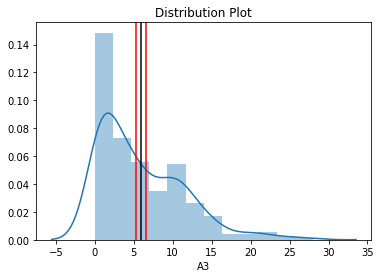

In [70]:
fig, ax = plt.subplots()
sns.distplot(plus_['A3'])
plt.title('Distribution Plot')
plt.axvline(mean_, c='k')
plt.axvline(l_bound, c='r')
plt.axvline(u_bound, c='r');

In [42]:
mean, __, __ = stats.bayes_mvs(minus_['A3'], 0.95)
mean

Mean(statistic=3.839947780678851, minmax=(3.4041524516216173, 4.2757431097360845))

In [0]:
mean_ = mean.statistic
l_bound = mean.minmax[0]
u_bound = mean.minmax[1]

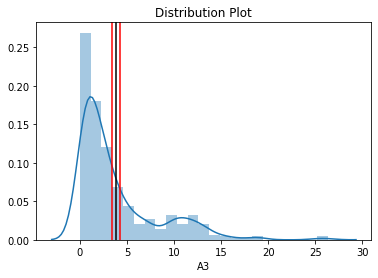

In [44]:
fig, ax = plt.subplots()
sns.distplot(minus_['A3'])
plt.title('Distribution Plot')
plt.axvline(mean_, c='k')
plt.axvline(l_bound, c='r')
plt.axvline(u_bound, c='r')

In [0]:
# We can see that A3 also has a higher mean for those in Class Name + and a larger confidence interval.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

<h1>Conclusion</h1>
The first T-test I ran on column A2 resulted in a P-value of 2 meaning that we must accept the null hypothesis; that the values in column A2 do NOT have an effect on the determination of a class name. Althought the second T-test I ran on column A14 resulted in a P-value of 0.008 which falls below our alpha value of 0.05. This means the we reject the null hypothesis and accept the alternative; the values in column A14 directly effect the determination of class name + or -.<br>
I used the same 2 columns above to run Chi-sqared tests to determine if columns A2 and A14 were dependantly or independantly related. The two Chi-squared tests above show P-values of 0.52 and 0.21 which are both greater than our alpha value of 0.05. Since this is the case we are forced to accept the null hypothesis that the values in A2 and A14 are not dependantly related even though higher values in the A14 column indicates a dependant relationship with Class Name being + or -.<br>
The hardest part of the sprint challenge was figuring out which columns to test and how to get them to behave the same way for manipulation and testing.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.

In [0]:
# Stretch Goal 2
def ttest_():

row_sums = contingency_with_margins.iloc[FIXTHIS].values
col_sums = contingency_with_margins.iloc[FIXTHIS].values

total = contingency_with_margins.loc['All','All']

print(row_sums)
print(col_sums)
print(total)

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

expected




chi_squared = (((observed - expected)**2)/expected).sum().sum()